# Pandas exercise for Asia University

In [0]:
import numpy as np
import pandas as pd

## 1. 請從Pokemon資料夾中讀入以下檔案
- Pokemon_g1.csv
- Pokemon_g1_extra.csv
- Pokemon_g2_6.csv
- Pokemon_g2_6_extra.csv

In [0]:
dat1=pd.read_csv("Pokemon_g1.csv", encoding = 'Windows-1252')
dat2=pd.read_csv("Pokemon_g1_extra.csv", encoding = 'Windows-1252')
dat3=pd.read_csv("Pokemon_g2_6.csv", encoding = 'Windows-1252')
dat4=pd.read_csv("Pokemon_g2_6_extra.csv", encoding = 'Windows-1252')


---

## 2. 請將此四份檔案正確的合併起來
    註：完整的檔案應該要有第一世代到第六世代的所有寶可夢，且除了基礎數值外也有標記此寶可夢為第幾世代且是否為傳說神奇寶貝

In [0]:

abc=dat1.join(dat2[['Generation', 'Legendary']])
cde=dat3.join(dat4[['Generation', 'Legendary']])

concate_data = [abc, cde]
x=pd.concat(concate_data, axis = 0)
x.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


---

## 3. 請觀察合併完的資料有哪幾個欄位有遺漏值

In [0]:
x.isna().sum()

#               0
Name            0
Type 1          1
Type 2        385
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       1
dtype: int64

---

## 4. 請將第一屬性與第二屬性為遺漏值的欄位取代為'no_'文字

In [0]:
aaa=x.copy()
aaa["Type 1"]=aaa["Type 1"].fillna("no_")
aaa["Type 2"]=aaa["Type 2"].fillna("no_")

---

## 5. 請新增一個欄位'tank'，並將防禦或血量高於100的寶可夢標記為1，其餘為0
    註：請確認共有幾隻寶可夢被標註為1

---

In [0]:
#all_dat['tank'] = 0
#all_dat.loc[(all_dat.Defense>100)|(all_dat.HP>100),'tank'] = 1
#all_dat.tank.sum()

def tank(r):
  if ((r["Defense"]>100) | (r["HP"]>100)):
    return 1
  else:
    return 0


aaa["tank"]=aaa.apply(tank,axis=1)
aaa["tank"].sum()

177

## 6. 請計算資料中各世代的寶可夢總數，並由多排到少

In [0]:
aaa["Generation"].value_counts().sort_values(ascending = False)


5        165
1        165
3        160
4        121
2        106
6         82
FALSE      1
Name: Generation, dtype: int64

---

## 7. 請計算第一屬性為普通系且第二屬性為飛行系的寶可夢共有幾隻

In [0]:
aaa[(aaa["Type 1"]=="Normal") & (aaa["Type 2"]=="Flying")].shape

(24, 14)

---

## 8. 請計算第一屬性與第二屬性的各種組合下，能力總和的平均數與防禦的最大值

In [0]:
aaa.groupby(['Type 1', 'Type 2']).agg({'Total':'mean', 'Defense':'max'})

Total  Defense
Type 1   Type 2                       
Bug      Electric  395.500000       60
         Fighting  550.000000      115
         Fire      455.000000       65
         Flying    419.500000      120
         Ghost     236.000000       45
         Grass     384.000000       90
         Ground    345.000000      105
         Poison    347.916667       99
         Rock      435.000000      230
         Steel     509.714286      140
         Water     269.000000       32
         no_       289.705882      100
Dark     Dragon    440.000000       90
         Fighting  418.000000      115
         Fire      476.666667       90
         Flying    494.000000      105
         Ghost     430.000000      125
         Ice       470.000000       65
         Psychic   385.000000       88
         Steel     415.000000      100
         no_       436.200000      110
Dragon   Electric  680.000000      120
         Fairy     590.000000      110
         Fire      680.000000      100
         Flying    641.666667      130
         Ground    522.000000      121
         Ice       686.666667      100
         Psychic   650.000000      120
         no_       413.363636      100
Electric Dragon    610.000000      105
...                       ...      ...
Rock     Ice       441.500000       72
         Psychic   440.000000       85
         Steel     456.666667      168
         Water     417.666667      125
         no_       409.444444      200
Steel    Dragon    680.000000      120
         Fairy     443.333333      125
         Fighting  580.000000      129
         Flying    465.000000      140
         Ghost     453.250000      150
         Ground    560.000000      230
         Psychic   488.571429      150
         Rock      430.000000      180
         no_       494.000000      230
Water    Dark      493.833333      109
         Dragon    610.000000      100
         Electric  395.000000       58
         Fairy     335.000000       80
         Fighting  556.666667       95
         Flying    404.000000      100
         Ghost     407.500000       70
         Grass     346.666667       70
         Ground    433.900000      110
         Ice       511.666667      180
         Poison    426.666667       75
         Psychic   481.000000      180
         Rock      428.750000      133
         Steel     530.000000       88
         no_       413.745763      120
no_      273        46.000000       40

[155 rows x 2 columns]

---

## 9. 請畫出血量與速度的散佈圖(scatter plot)

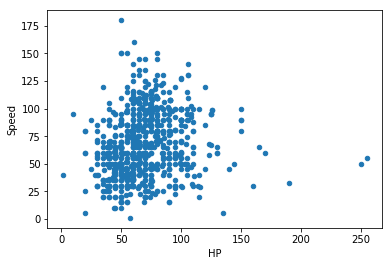

In [0]:
aaa.plot.scatter("HP","Speed")

---

## 10. 請計算出各屬性(Type 1即可)神奇寶貝防禦跟特別防禦的相關係數**

In [87]:
aaa.groupby("Type 1").apply(lambda x: np.corrcoef(x["Defense"],x["Sp. Def"])[0,1])

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Type 1
Bug         0.680386
Dark        0.865349
Dragon      0.485671
Electric    0.822720
Fairy       0.401922
Fighting    0.648170
Fire        0.627849
Flying      0.976506
Ghost       0.745279
Grass       0.514053
Ground      0.445404
Ice         0.151196
Normal      0.579669
Poison      0.565603
Psychic     0.733263
Rock        0.557787
Steel       0.235127
Water       0.378959
no_              NaN
dtype: float64

---